Importing libraries

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

Loading the actual data from the csv file

In [95]:
df = pd.read_csv(r'E:\xy_data.csv')
x_data = df.iloc[:, 0].values
y_data = df.iloc[:, 1].values
n_points = len(x_data)

print("Data loaded:")
print(f"Points: {n_points}, X: [{x_data.min():.1f}, {x_data.max():.1f}], Y: [{y_data.min():.1f}, {y_data.max():.1f}]")

Data loaded:
Points: 1500, X: [59.7, 109.2], Y: [46.0, 69.7]


Defing the parametric equations and L1 computation

In [96]:
def parametric_eqn(t, theta, M, X):
    x = t * np.cos(theta) - np.exp(M * np.abs(t)) * np.sin(0.3 * t) * np.sin(theta) + X
    y = 42 + t * np.sin(theta) + np.exp(M * np.abs(t)) * np.sin(0.3 * t) * np.cos(theta)
    return x, y


def l1_error(params):
    theta, M, X = params
    t = np.linspace(6, 60, 1500)
    x_curve, y_curve = parametric_eqn(t, theta, M, X)
    
    total_error = 0
    for i in range(n_points):
        distances = np.abs(x_curve - x_data[i]) + np.abs(y_curve - y_data[i])
        total_error += np.min(distances)
    return total_error / n_points

Initialization of the unknowns

In [97]:
theta_initial = np.deg2rad(25)
M_initial = 0.0
X_initial = 50.0

initial_params = [theta_initial, M_initial, X_initial]
initial_error = l1_error(initial_params)

print("Initial setup:")
print(f"θ: {np.rad2deg(theta_initial):.1f} degrees, M: {M_initial}, X: {X_initial}")
print(f"Initial L1 Error: {initial_error:.4f}")

Initial setup:
θ: 25.0 degrees, M: 0.0, X: 50.0
Initial L1 Error: 2.2321


Optimization for the bound values of the unknowns

In [98]:
bounds = [(0, np.deg2rad(50)), (-0.05, 0.05), (0, 100)]

print("Optimizing...")
result = minimize(
    l1_error,
    initial_params,
    method='L-BFGS-B',
    bounds=bounds,
    options={'maxiter': 500}
)

theta_opt, M_opt, X_opt = result.x
final_error = result.fun


print("Optimization complete!")
print(f"Final L1 Error: {final_error:.6f}")

Optimizing...
Optimization complete!
Final L1 Error: 0.013358


Printing of the optimized parameters

In [99]:
print("FINAL OPTIMAL PARAMETERS")
print(f"theta = {np.rad2deg(theta_opt):.8f} degrees")
print(f"M     = {M_opt:.8f}")
print(f"X     = {X_opt:.8f}")
print(f"L1 Error = {final_error:.8f}")


FINAL OPTIMAL PARAMETERS
theta = 29.99949062 degrees
M     = 0.03000126
X     = 54.99860335
L1 Error = 0.01335823


Plotting of the results

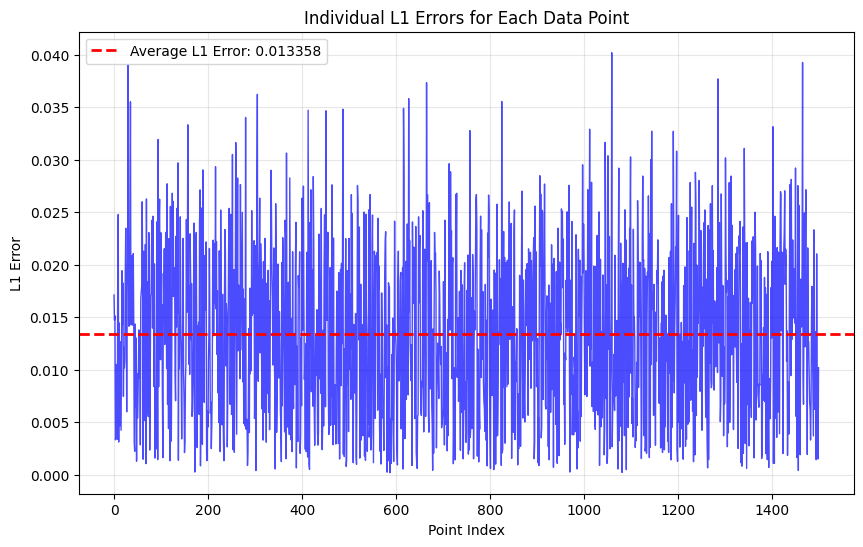

Total L1 Error (sum of all points): 20.03733946
Average L1 Error (total / 1500): 0.01335823


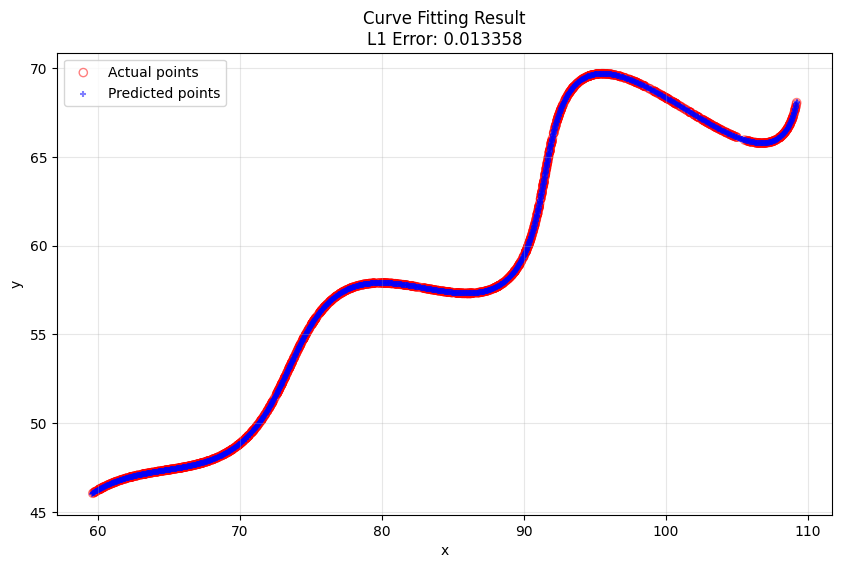

In [105]:
t_plot = np.linspace(6, 60, 1500)
x_curve, y_curve = parametric_eqn(t_plot, theta_opt, M_opt, X_opt)

individual_errors = []
for i in range(n_points):
    distances = np.abs(x_curve - x_data[i]) + np.abs(y_curve - y_data[i])
    individual_errors.append(np.min(distances))

plt.figure(figsize=(10, 6))
plt.plot(range(n_points), individual_errors, 'b-', alpha=0.7, linewidth=1)
plt.axhline(y=final_error, color='red', linestyle='--', linewidth=2, label=f'Average L1 Error: {final_error:.6f}')
plt.xlabel('Point Index')
plt.ylabel('L1 Error')
plt.title('Individual L1 Errors for Each Data Point')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

total_l1 = sum(individual_errors)
print(f"Total L1 Error (sum of all points): {total_l1:.8f}")
print(f"Average L1 Error (total / {n_points}): {final_error:.8f}")

plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, s=35, marker='o', alpha=0.5, label='Actual points',facecolors='none', edgecolors='red')
plt.scatter(x_curve, y_curve, s=15, marker='+', alpha=0.5, label='Predicted points', color='b')
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Curve Fitting Result\nL1 Error: {final_error:.6f}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()